In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/work/dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/work/dataset/credits.csv
/work/dataset/links_small.csv
/work/dataset/ratings.csv
/work/dataset/links.csv
/work/dataset/movies_metadata.csv
/work/dataset/keywords.csv
/work/dataset/spoken_languages.csv
/work/dataset/ratings_small.csv


In [2]:
import glob
# load all csv files
file_dir  = '/work/dataset'
files =  glob.glob(os.path.join(file_dir, "*.csv"))

In [3]:
df_dict = dict()
for file in files:
    df_dict[os.path.splitext(os.path.basename(file))[0]] = pd.read_csv(file, low_memory=False)

In [4]:
df_dict.keys()

dict_keys(['credits', 'links_small', 'ratings', 'links', 'movies_metadata', 'keywords', 'spoken_languages', 'ratings_small'])

## helper Functions

In [5]:
import json
import ast
def filter_str(st:str)->list:
    list_ = []
    i = 0
    if st == 0:
        return []
    if isinstance(st,str):
        while i < len(st):
            if st[i] == '[' or st[i] == ']':
                i += 1
                continue
            temp = ''
            if st[i] == '{':
                while st[i] != '}':
                    temp += st[i]
                    i+=1
            if temp != '':      
                temp += '}'
                list_.append(ast.literal_eval(temp)) 
            i += 1
    return list_   

def get_dataframe(df:pd.Series, col:str, ids_relation:pd.Series)->pd.DataFrame:
    arr = []
    counter = 0
    for st in list(df):
        if st:
            lst = filter_str(st)
            for item in lst:
                arr.append(list(item.values())+[ids_relation[counter]])
#             arr.extend([int(ids_relation[counter])]*len(lst))
            counter +=1
        else:
#             arr.append([np.nan]*)
            pass
            
    if col == 'cast':        
        return pd.DataFrame(arr,columns= ['cast_id','character','credit_id','gender','id','name','order','profile_path','id_relation'])
    elif col == 'crew':
        return pd.DataFrame(arr,columns=['credit_id','department','gender','id','job','name','profile_path','id_relation'])
    elif col == 'keywords':
        return pd.DataFrame(arr,columns=['id','name','id_relation'])


In [6]:
cast_df = get_dataframe(df_dict['credits'].cast,col='cast',ids_relation = df_dict['credits']['id'])

In [7]:
cast_df.head()

,cast_id,character,credit_id,gender,id,name,order,profile_path,id_relation
0,14,Woody (voice),52fe4284c3a36847f8024f95,2,31,Tom Hanks,0,/pQFoyx7rp09CJTAb932F2g8Nlho.jpg,862
1,15,Buzz Lightyear (voice),52fe4284c3a36847f8024f99,2,12898,Tim Allen,1,/uX2xVf6pMmPepxnvFWyBtjexzgY.jpg,862
2,16,Mr. Potato Head (voice),52fe4284c3a36847f8024f9d,2,7167,Don Rickles,2,/h5BcaDMPRVLHLDzbQavec4xfSdt.jpg,862
3,17,Slinky Dog (voice),52fe4284c3a36847f8024fa1,2,12899,Jim Varney,3,/eIo2jVVXYgjDtaHoF19Ll9vtW7h.jpg,862
4,18,Rex (voice),52fe4284c3a36847f8024fa5,2,12900,Wallace Shawn,4,/oGE6JqPP2xH4tNORKNqxbNPYi7u.jpg,862


In [8]:
crew_df = get_dataframe(df_dict['credits'].crew,col='crew',ids_relation = df_dict['credits']['id'])


In [9]:
crew_df.head()

,credit_id,department,gender,id,job,name,profile_path,id_relation
0,52fe4284c3a36847f8024f49,Directing,2,7879,Director,John Lasseter,/7EdqiNbr4FRjIhKHyPPdFfEEEFG.jpg,862
1,52fe4284c3a36847f8024f4f,Writing,2,12891,Screenplay,Joss Whedon,/dTiVsuaTVTeGmvkhcyJvKp2A5kr.jpg,862
2,52fe4284c3a36847f8024f55,Writing,2,7,Screenplay,Andrew Stanton,/pvQWsu0qc8JFQhMVJkTHuexUAa1.jpg,862
3,52fe4284c3a36847f8024f5b,Writing,2,12892,Screenplay,Joel Cohen,/dAubAiZcvKFbboWlj7oXOkZnTSu.jpg,862
4,52fe4284c3a36847f8024f61,Writing,0,12893,Screenplay,Alec Sokolow,/v79vlRYi94BZUQnkkyznbGUZLjT.jpg,862


In [10]:
del df_dict['credits']

In [11]:
df_dict['cast'] = cast_df
df_dict['crew'] = crew_df

# Prepare Keywords Table

In [12]:
df_dict['keywords']

,id,keywords
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,15602,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,31357,"[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,11862,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."
...,...,...
46414,439050,"[{'id': 10703, 'name': 'tragic love'}]"
46415,111109,"[{'id': 2679, 'name': 'artist'}, {'id': 14531,..."
46416,67758,[]
46417,227506,[]


In [13]:
keywords_df = get_dataframe(df = df_dict['keywords']['keywords'],
                            col='keywords',
                            ids_relation=df_dict['keywords']['id'])

In [14]:
keywords_df.head()

,id,name,id_relation
0,931,jealousy,862
1,4290,toy,862
2,5202,boy,862
3,6054,friendship,862
4,9713,friends,862


In [15]:
df_dict['keywords'] = keywords_df

In [16]:
df_dict['keywords']

,id,name,id_relation
0,931,jealousy,862
1,4290,toy,862
2,5202,boy,862
3,6054,friendship,862
4,9713,friends,862
...,...,...,...
158675,11800,mockumentary,289923
158676,10703,tragic love,439050
158677,2679,artist,111109
158678,14531,play,111109


In [17]:
df_dict.keys()

dict_keys(['links_small', 'ratings', 'links', 'movies_metadata', 'keywords', 'spoken_languages', 'ratings_small', 'cast', 'crew'])

## Prepare ratings Table

In [18]:
df_dict['ratings']['timestamp'] = pd.to_datetime((df_dict['ratings']['timestamp']),unit='s')

In [19]:
df_dict['ratings'] 

,userId,movieId,rating,timestamp
0,1,110,1.0,2015-03-09 22:52:09
1,1,147,4.5,2015-03-09 23:07:15
2,1,858,5.0,2015-03-09 22:52:03
3,1,1221,5.0,2015-03-09 22:52:26
4,1,1246,5.0,2015-03-09 22:52:36
...,...,...,...,...
26024284,270896,58559,5.0,2009-10-31 23:26:04
26024285,270896,60069,5.0,2009-10-31 23:33:52
26024286,270896,63082,4.5,2009-10-31 23:29:24
26024287,270896,64957,4.5,2009-11-01 00:06:30


In [20]:
df_dict['ratings_small']

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
...,...,...,...,...
99999,671,6268,2.5,1065579370
100000,671,6269,4.0,1065149201
100001,671,6365,4.0,1070940363
100002,671,6385,2.5,1070979663


## Prepare movies mate date Table

In [21]:
pd.set_option('display.max_columns', None)
df_dict['movies_metadata']

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,0.072051,/jldsYflnId4tTWPx8es3uzsB1I8.jpg,[],"[{'iso_3166_1': 'IR', 'name': 'Iran'}]",NaN,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0
45462,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,0.178241,/xZkmxsNmYXJbKVsTRLLx3pqGHx7.jpg,"[{'name': 'Sine Olivia', 'id': 19653}]","[{'iso_3166_1': 'PH', 'name': 'Philippines'}]",2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0
45463,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",0.903007,/d5bX92nDsISNhu3ZT69uHwmfCGw.jpg,"[{'name': 'American World Pictures', 'id': 6165}]","[{'iso_3166_1': 'US', 'name': 'United States o...",2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0
45

In [22]:
df_dict['movies_metadata'].columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [23]:
df_dict['movies_metadata']['belongs_to_collection'] = df_dict['movies_metadata']['belongs_to_collection'].apply(lambda x: filter_str(x)[0]['name'] if filter_str(x) else np.nan)

In [24]:
df_dict['movies_metadata'].isna().sum()

adult                        0
belongs_to_collection    40975
budget                       0
genres                       0
homepage                 37684
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   5
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      6
runtime                    263
spoken_languages             6
status                      87
tagline                  25054
title                        6
video                        6
vote_average                 6
vote_count                   6
dtype: int64

In [25]:
for item in df_dict['movies_metadata']['genres'][:10]:
    print(item)

[{'id': 16, 'name': 'Animation'}, {'id': 35, 'name': 'Comedy'}, {'id': 10751, 'name': 'Family'}]
[{'id': 12, 'name': 'Adventure'}, {'id': 14, 'name': 'Fantasy'}, {'id': 10751, 'name': 'Family'}]
[{'id': 10749, 'name': 'Romance'}, {'id': 35, 'name': 'Comedy'}]
[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'name': 'Drama'}, {'id': 10749, 'name': 'Romance'}]
[{'id': 35, 'name': 'Comedy'}]
[{'id': 28, 'name': 'Action'}, {'id': 80, 'name': 'Crime'}, {'id': 18, 'name': 'Drama'}, {'id': 53, 'name': 'Thriller'}]
[{'id': 35, 'name': 'Comedy'}, {'id': 10749, 'name': 'Romance'}]
[{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'id': 18, 'name': 'Drama'}, {'id': 10751, 'name': 'Family'}]
[{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'id': 53, 'name': 'Thriller'}]
[{'id': 12, 'name': 'Adventure'}, {'id': 28, 'name': 'Action'}, {'id': 53, 'name': 'Thriller'}]


In [26]:
genre_dict = dict()
for genre in list(df_dict['movies_metadata']['genres']):
    lst = filter_str(genre)
#     print(lst)
    for item in lst:
        if int(item['id']) not in genre_dict:
            genre_dict[int(item['id'])] = item['name']
            

In [27]:
genre_dict = dict(sorted(genre_dict.items()))
genre_dict

{12: 'Adventure',
 14: 'Fantasy',
 16: 'Animation',
 18: 'Drama',
 27: 'Horror',
 28: 'Action',
 35: 'Comedy',
 36: 'History',
 37: 'Western',
 53: 'Thriller',
 80: 'Crime',
 99: 'Documentary',
 878: 'Science Fiction',
 2883: 'Aniplex',
 7759: 'GoHands',
 7760: 'BROSTA TV',
 7761: 'Mardock Scramble Production Committee',
 9648: 'Mystery',
 10402: 'Music',
 10749: 'Romance',
 10751: 'Family',
 10752: 'War',
 10769: 'Foreign',
 10770: 'TV Movie',
 11176: 'Carousel Productions',
 11602: 'Vision View Entertainment',
 17161: 'Odyssey Media',
 18012: 'Pulser Productions',
 18013: 'Rogue State',
 23822: 'The Cartel',
 29812: 'Telescene Film Group Productions',
 33751: 'Sentai Filmworks'}

In [28]:
for country in df_dict['movies_metadata']['production_countries'][:20]:
    print(country)

[{'iso_3166_1': 'US', 'name': 'United States of America'}]
[{'iso_3166_1': 'US', 'name': 'United States of America'}]
[{'iso_3166_1': 'US', 'name': 'United States of America'}]
[{'iso_3166_1': 'US', 'name': 'United States of America'}]
[{'iso_3166_1': 'US', 'name': 'United States of America'}]
[{'iso_3166_1': 'US', 'name': 'United States of America'}]
[{'iso_3166_1': 'DE', 'name': 'Germany'}, {'iso_3166_1': 'US', 'name': 'United States of America'}]
[{'iso_3166_1': 'US', 'name': 'United States of America'}]
[{'iso_3166_1': 'US', 'name': 'United States of America'}]
[{'iso_3166_1': 'GB', 'name': 'United Kingdom'}, {'iso_3166_1': 'US', 'name': 'United States of America'}]
[{'iso_3166_1': 'US', 'name': 'United States of America'}]
[{'iso_3166_1': 'FR', 'name': 'France'}, {'iso_3166_1': 'US', 'name': 'United States of America'}]
[{'iso_3166_1': 'US', 'name': 'United States of America'}]
[{'iso_3166_1': 'US', 'name': 'United States of America'}]
[{'iso_3166_1': 'FR', 'name': 'France'}, {'is

In [29]:
countries = dict()
for genre in list(df_dict['movies_metadata']['production_countries']):
    lst = filter_str(genre)
    for item in lst:
        if (item['iso_3166_1']) not in countries:
            countries[item['iso_3166_1']] = item['name']

In [30]:
countries

{'US': 'United States of America',
 'DE': 'Germany',
 'GB': 'United Kingdom',
 'FR': 'France',
 'IT': 'Italy',
 'ES': 'Spain',
 'CN': 'China',
 'AU': 'Australia',
 'ZA': 'South Africa',
 'CA': 'Canada',
 'CH': 'Switzerland',
 'BE': 'Belgium',
 'JP': 'Japan',
 'IR': 'Iran',
 'NL': 'Netherlands',
 'HK': 'Hong Kong',
 'TN': 'Tunisia',
 'IE': 'Ireland',
 'DO': 'Dominican Republic',
 'HR': 'Croatia',
 'RU': 'Russia',
 'MK': 'Macedonia',
 'AT': 'Austria',
 'TW': 'Taiwan',
 'NZ': 'New Zealand',
 'MX': 'Mexico',
 'PL': 'Poland',
 'PE': 'Peru',
 'CU': 'Cuba',
 'LI': 'Liechtenstein',
 'DK': 'Denmark',
 'PT': 'Portugal',
 'FI': 'Finland',
 'SE': 'Sweden',
 'AR': 'Argentina',
 'IS': 'Iceland',
 'KR': 'South Korea',
 'RS': 'Serbia',
 'HU': 'Hungary',
 'CZ': 'Czech Republic',
 'IN': 'India',
 'BR': 'Brazil',
 'GR': 'Greece',
 'CD': 'Congo',
 'SN': 'Senegal',
 'BF': 'Burkina Faso',
 'RO': 'Romania',
 'PH': 'Philippines',
 'VN': 'Vietnam',
 'TT': 'Trinidad and Tobago',
 'BG': 'Bulgaria',
 'CL': 'Chile

In [31]:
countries = dict(sorted(countries.items()))
# countries

In [32]:
countries_df =pd.DataFrame(countries.values(),columns=['country_name'],index=countries.keys())
df_dict['production_countries'] = countries_df

In [33]:
def handle_production_countries(country):
    lst = filter_str(country)
    ids = [item['iso_3166_1'] for item in lst if 'iso_3166_1' in item]
    return ids

# handle_genre(df_dict['movies_metadata']['genres'][2])
production_countries  = df_dict['movies_metadata']['production_countries'].apply(lambda x: handle_production_countries(x))
df_dict['movies_metadata']['production_countries'] = production_countries
temp = df_dict['movies_metadata'][['production_countries','id']]
production_countries_relation = temp.explode('production_countries')
df_dict['movies_metadata'].drop(['production_countries'],axis=1,inplace=True)

In [34]:
df_dict['production_countries_relation'] = production_countries_relation

In [35]:
df_dict['movies_metadata']

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,Toy Story Collection,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,Grumpy Old Men Collection,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,Father of the Bride Collection,0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,0.072051,/jldsYflnId4tTWPx8es3uzsB1I8.jpg,[],NaN,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0
45462,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,0.178241,/xZkmxsNmYXJbKVsTRLLx3pqGHx7.jpg,"[{'name': 'Sine Olivia', 'id': 19653}]",2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0
45463,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",0.903007,/d5bX92nDsISNhu3ZT69uHwmfCGw.jpg,"[{'name': 'American World Pictures', 'id': 6165}]",2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0
45464,False,NaN,0,[],NaN,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",0.003503,/aorBPO7ak8e8iJKT5OcqYxU3jlK.jpg,"[{'name': 'Yermoliev', 'id': 88753}]",1917-10-21,0.0,87.0,[],Released,NaN,Satan Triumphant,False,0.0,0.0


In [36]:
for item in df_dict['movies_metadata']['production_companies'][:10]:
    print(item)

[{'name': 'Pixar Animation Studios', 'id': 3}]
[{'name': 'TriStar Pictures', 'id': 559}, {'name': 'Teitler Film', 'id': 2550}, {'name': 'Interscope Communications', 'id': 10201}]
[{'name': 'Warner Bros.', 'id': 6194}, {'name': 'Lancaster Gate', 'id': 19464}]
[{'name': 'Twentieth Century Fox Film Corporation', 'id': 306}]
[{'name': 'Sandollar Productions', 'id': 5842}, {'name': 'Touchstone Pictures', 'id': 9195}]
[{'name': 'Regency Enterprises', 'id': 508}, {'name': 'Forward Pass', 'id': 675}, {'name': 'Warner Bros.', 'id': 6194}]
[{'name': 'Paramount Pictures', 'id': 4}, {'name': 'Scott Rudin Productions', 'id': 258}, {'name': 'Mirage Enterprises', 'id': 932}, {'name': 'Sandollar Productions', 'id': 5842}, {'name': 'Constellation Entertainment', 'id': 14941}, {'name': 'Worldwide', 'id': 55873}, {'name': 'Mont Blanc Entertainment GmbH', 'id': 58079}]
[{'name': 'Walt Disney Pictures', 'id': 2}]
[{'name': 'Universal Pictures', 'id': 33}, {'name': 'Imperial Entertainment', 'id': 21437}, {'

In [37]:
companies = dict()
for company in list(df_dict['movies_metadata']['production_companies']):
    lst = filter_str(company)
    for item in lst:
        if int(item['id']) not in companies:
            companies[int(item['id'])] = item['name']

In [38]:
companies = dict(sorted(companies.items()))
companies_df = pd.DataFrame(companies.values(),index=companies.keys(),columns=['company_name'])
companies_df

,company_name
1,Lucasfilm
2,Walt Disney Pictures
3,Pixar Animation Studios
4,Paramount Pictures
5,Columbia Pictures
...,...
96028,Produzione Esecutiva Cinematografica (PEC)
96035,Hawk's Nest Productions
96043,Humble Journey Films
96053,Ibérica Filmes


In [39]:
def handle_production_companies(company):
    lst = filter_str(company)
    ids = [int(item['id']) for item in lst if 'id' in item]
    return ids


production_companies  = df_dict['movies_metadata']['production_companies'].apply(lambda x: handle_production_companies(x))
df_dict['movies_metadata']['production_companies'] = production_companies
temp = df_dict['movies_metadata'][['production_companies','id']]
production_companies_relation = temp.explode('production_companies')
df_dict['movies_metadata'].drop(['production_companies'],axis=1,inplace=True)
df_dict['production_companies_relation'] = production_companies_relation

In [40]:
df_dict['movies_metadata']

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,Toy Story Collection,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,Grumpy Old Men Collection,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,Father of the Bride Collection,0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,/e64sOI48hQXyru7naBFyssKFxVd.jpg,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,0.072051,/jldsYflnId4tTWPx8es3uzsB1I8.jpg,NaN,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0
45462,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,0.178241,/xZkmxsNmYXJbKVsTRLLx3pqGHx7.jpg,2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0
45463,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",0.903007,/d5bX92nDsISNhu3ZT69uHwmfCGw.jpg,2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0
45464,False,NaN,0,[],NaN,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",0.003503,/aorBPO7ak8e8iJKT5OcqYxU3jlK.jpg,1917-10-21,0.0,87.0,[],Released,NaN,Satan Triumphant,False,0.0,0.0


In [41]:
for item in df_dict['movies_metadata']['spoken_languages'][:10]:
    print(item)

[{'iso_639_1': 'en', 'name': 'English'}]
[{'iso_639_1': 'en', 'name': 'English'}, {'iso_639_1': 'fr', 'name': 'Français'}]
[{'iso_639_1': 'en', 'name': 'English'}]
[{'iso_639_1': 'en', 'name': 'English'}]
[{'iso_639_1': 'en', 'name': 'English'}]
[{'iso_639_1': 'en', 'name': 'English'}, {'iso_639_1': 'es', 'name': 'Español'}]
[{'iso_639_1': 'fr', 'name': 'Français'}, {'iso_639_1': 'en', 'name': 'English'}]
[{'iso_639_1': 'en', 'name': 'English'}, {'iso_639_1': 'de', 'name': 'Deutsch'}]
[{'iso_639_1': 'en', 'name': 'English'}]
[{'iso_639_1': 'en', 'name': 'English'}, {'iso_639_1': 'ru', 'name': 'Pусский'}, {'iso_639_1': 'es', 'name': 'Español'}]


In [42]:
spoken_languages = dict()
for lang in list(df_dict['movies_metadata']['spoken_languages']):
    lst = filter_str(lang)
    for item in lst:
        if item['iso_639_1'] not in spoken_languages:
            spoken_languages[item['iso_639_1']] = item['name']

spoken_languages

{'en': 'English',
 'fr': 'Français',
 'es': 'Español',
 'de': 'Deutsch',
 'ru': 'Pусский',
 'la': 'Latin',
 'nl': 'Nederlands',
 'cn': '广州话 / 廣州話',
 'zh': '普通话',
 'hu': 'Magyar',
 'sq': 'shqip',
 'it': 'Italiano',
 'ko': '한국어/조선말',
 'fa': 'فارسی',
 'da': 'Dansk',
 'gd': '',
 'ja': '日本語',
 'ar': 'العربية',
 'hr': 'Hrvatski',
 'bs': 'Bosanski',
 'mn': '',
 'ro': 'Română',
 'id': 'Bahasa indonesia',
 'ms': 'Bahasa melayu',
 'mk': '',
 'sv': 'svenska',
 'he': 'עִבְרִית',
 'kw': '',
 'cs': 'Český',
 'nv': '',
 'mi': '',
 'tl': '',
 'pl': 'Polski',
 'ga': 'Gaeilge',
 'no': 'Norsk',
 'sk': 'Slovenčina',
 'vi': 'Tiếng Việt',
 'yi': '',
 'pt': 'Português',
 'hi': 'हिन्दी',
 'ca': 'Català',
 'is': 'Íslenska',
 'af': 'Afrikaans',
 'sr': 'Srpski',
 'bn': 'বাংলা',
 'wo': 'Wolof',
 'cy': 'Cymraeg',
 'th': 'ภาษาไทย',
 'lv': 'Latviešu',
 'sw': 'Kiswahili',
 'bg': 'български език',
 'el': 'ελληνικά',
 'ne': '',
 'tr': 'Türkçe',
 'km': '',
 'fi': 'suomi',
 'eo': 'Esperanto',
 'uk': 'Український',
 'iu':

In [43]:
no_value = []
for key,value in spoken_languages.items():
    if value == '':
        no_value.append(key)
    if '?' in value:
        spoken_languages[key] = ''
        no_value.append(key)

print(no_value)

['gd', 'mn', 'mk', 'kw', 'nv', 'mi', 'tl', 'yi', 'ne', 'km', 'iu', 'sh', 'bo', 'ty', 'si', 'as', 'gn', 'lo', 'xh', 'cr', 'ku', 'hy', 'oc', 'to', 'ce', 'qu', 'am', 'tg', 'tt', 'se', 'ml', 'co', 'dz', 'ht', 'ln', 'my', 'sa', 'fy', 'tk', 'ny', 'st', 'sc', 'gu', 'mr', 'ug', 'ay', 'ky', 'jv', 'br', 'sg', 'lb', 'ab', 'kn', 'sm', 'ki', 'tn', 'fo', 'sn', 'bi', 'ig', 'mh']


In [44]:
import csv

with open('spoken_languages.csv', 'w', newline='', encoding='utf-8') as csvfile:
    fieldnames = ['Movie', 'Language']  # Defina os nomes das colunas no arquivo CSV
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

    # Escreva o cabeçalho do CSV
    writer.writeheader()

    for key, value in spoken_languages.items():
        # Se o valor for uma string vazia ou contiver '?', defina-o como vazio ('')
        if value == '' or '?' in value:
            spoken_languages[key] = ''
            no_value.append(key)
        
        # Escreva o par chave-valor no arquivo CSV
        writer.writerow({'Movie': key, 'Language': value})

print(no_value)


['gd', 'mn', 'mk', 'kw', 'nv', 'mi', 'tl', 'yi', 'ne', 'km', 'iu', 'sh', 'bo', 'ty', 'si', 'as', 'gn', 'lo', 'xh', 'cr', 'ku', 'hy', 'oc', 'to', 'ce', 'qu', 'am', 'tg', 'tt', 'se', 'ml', 'co', 'dz', 'ht', 'ln', 'my', 'sa', 'fy', 'tk', 'ny', 'st', 'sc', 'gu', 'mr', 'ug', 'ay', 'ky', 'jv', 'br', 'sg', 'lb', 'ab', 'kn', 'sm', 'ki', 'tn', 'fo', 'sn', 'bi', 'ig', 'mh', 'gd', 'mn', 'mk', 'kw', 'nv', 'mi', 'tl', 'yi', 'ne', 'km', 'iu', 'sh', 'bo', 'ty', 'si', 'as', 'gn', 'lo', 'xh', 'cr', 'ku', 'hy', 'oc', 'to', 'ce', 'qu', 'am', 'tg', 'tt', 'se', 'ml', 'co', 'dz', 'ht', 'ln', 'my', 'sa', 'fy', 'tk', 'ny', 'st', 'sc', 'gu', 'mr', 'ug', 'ay', 'ky', 'jv', 'br', 'sg', 'lb', 'ab', 'kn', 'sm', 'ki', 'tn', 'fo', 'sn', 'bi', 'ig', 'mh']


In [45]:
df_dict['movies_metadata']['spoken_languages'] = df_dict['movies_metadata']['spoken_languages'].fillna(0)

In [46]:
df_dict['movies_metadata']['spoken_languages'][:2].index

RangeIndex(start=0, stop=2, step=1)

In [47]:
st = "[{'iso_639_1': 'en', 'name': 'English'}, {'iso_639_1': 'es', 'name': 'Español'}]"
filter_str(st)

[{'iso_639_1': 'en', 'name': 'English'},
 {'iso_639_1': 'es', 'name': 'Español'}]

In [48]:
df_dict['movies_metadata']['spoken_languages'].value_counts()[0]

6

In [49]:
check = "[{'iso_639_1': 'bg', 'name': 'български език'}, {'iso_639_1': 'cs', 'name': 'Český'}, {'iso_639_1': 'en', 'name': 'English'}, {'iso_639_1': 'fr', 'name': 'Français'}, {'iso_639_1': 'hu', 'name': 'Magyar'}, {'iso_639_1': 'ja', 'name': '日本語'}, {'iso_639_1': 'lt', 'name': 'Lietuvi\x9akai'}, {'iso_639_1': 'pl', 'name': 'Polski'}, {'iso_639_1': 'es', 'name': 'Español'}]"
(json.loads(str(check).strip().replace('\'', '"')))

[{'iso_639_1': 'bg', 'name': 'български език'},
 {'iso_639_1': 'cs', 'name': 'Český'},
 {'iso_639_1': 'en', 'name': 'English'},
 {'iso_639_1': 'fr', 'name': 'Français'},
 {'iso_639_1': 'hu', 'name': 'Magyar'},
 {'iso_639_1': 'ja', 'name': '日本語'},
 {'iso_639_1': 'lt', 'name': 'Lietuvi\x9akai'},
 {'iso_639_1': 'pl', 'name': 'Polski'},
 {'iso_639_1': 'es', 'name': 'Español'}]

In [50]:
import copy
import sys
def load_json(x):
    if x == 0:
        return None
    try:
        x = x.replace('\\','-') # without it the code will give expection due to \ in the string
        return json.loads(str(x).strip().replace('\'', '"'))
    except json.JSONDecodeError as e:
        print(f"Failed to decode: {x}")
        return None  # or return a default value

df_dict['movies_metadata']['spoken_languages'] = df_dict['movies_metadata']['spoken_languages'].apply(load_json)


In [51]:
df_dict['movies_metadata']['spoken_languages'].isna().sum()

6

In [52]:
spoken_lang_relation = df_dict['movies_metadata'][['id','spoken_languages']].explode('spoken_languages').dropna()

In [53]:
spoken_lang_relation['spoken_languages'] = spoken_lang_relation['spoken_languages'].apply(lambda x: x['iso_639_1'])

In [54]:
spoken_lang_relation[spoken_lang_relation['spoken_languages'] == 'xx'].count()
# we have to remove this entries from our relation 

id                  319
spoken_languages    319
dtype: int64

In [55]:
spoken_lang_relation = spoken_lang_relation[spoken_lang_relation['spoken_languages'] != 'xx']

In [56]:
spoken_lang_relation.reset_index(drop=True,inplace=True)

In [57]:
spoken_lang_relation

,id,spoken_languages
0,862,en
1,8844,en
2,8844,fr
3,15602,en
4,31357,en
...,...,...
52976,30840,en
52977,439050,fa
52978,111109,tl
52979,67758,en


In [58]:
df_dict['spoken_lang_relation'] = spoken_lang_relation

In [59]:
df_dict['movies_metadata'].drop(columns = ['spoken_languages'],axis= 1,inplace=True)

In [60]:
df_dict['movies_metadata'].head(10)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,release_date,revenue,runtime,status,tagline,title,video,vote_average,vote_count
0,False,Toy Story Collection,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,1995-10-30,373554033.0,81.0,Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,1995-12-15,262797249.0,104.0,Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,Grumpy Old Men Collection,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,1995-12-22,0.0,101.0,Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,1995-12-22,81452156.0,127.0,Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,Father of the Bride Collection,0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,/e64sOI48hQXyru7naBFyssKFxVd.jpg,1995-02-10,76578911.0,106.0,Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
5,False,NaN,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",NaN,949,tt0113277,en,Heat,"Obsessive master thief, Neil McCauley leads a ...",17.924927,/zMyfPUelumio3tiDKPffaUpsQTD.jpg,1995-12-15,187436818.0,170.0,Released,A Los Angeles Crime Saga,Heat,False,7.7,1886.0
6,False,NaN,58000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,11860,tt0114319,en,Sabrina,An ugly duckling having undergone a remarkable...,6.677277,/jQh15y5YB7bWz1NtffNZmRw0s9D.jpg,1995-12-15,0.0,127.0,Released,You are cordially invited to the most surprisi...,Sabrina,False,6.2,141.0
7,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,45325,tt0112302,en,Tom and Huck,"A mischievous young boy, Tom Sawyer, witnesses...",2.561161,/sGO5Qa55p7wTu7FJcX4H4xIVKvS.jpg,1995-12-22,0.0,97.0,Released,The Original Bad Boys.,Tom and Huck,False,5.4,45.0
8,False,NaN,35000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,9091,tt0114576,en,Sudden Death,International action superstar Jean Claude Van...,5.23158,/eoWvKD60lT95Ss1MYNgVExpo5iU.jpg,1995-12-22,64350171.0,106.0,Released,Terror goes into overtime.,Sudden Death,False,5.5,174.0
9,False,James Bond Collection,58000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",http://www.mgm.com/view/movie/757/Goldeneye/,710,tt0113189,en,GoldenEye,James Bond must unmask the mysterious head of ...,14.686036,/5c0ovjT41KnYIHYuF4AWsTe3sKh.jpg,1995-11-16,352194034.0,130.0,Released,No limits. No fears. No substitutes.,GoldenEye,False,6.6,1194.0


In [61]:
languages_codes = pd.DataFrame({'code':spoken_languages.keys(),'name':spoken_languages.values()})

In [62]:
pip install surprise


[notice] A new release of pip is available: 23.0.1 -> 23.3
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


# IA Naive Bayes

In [63]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_curve, roc_auc_score
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import numpy as np

# 1. Coleta de Dados (substitua com seus próprios dados)
# Suponha que você tenha um DataFrame 'df' com colunas: 'movie_id', 'user_id', 'rating', 'genre', etc.

filmes = pd.read_csv('/work/dataset/movies_metadata.csv', low_memory = False)
filmes.head()


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


# Pré processamento dos dados

In [64]:
# Filtrando somente as colunas necessárias e renomeando nomes das variáveis

# Seleciona somente as variáveis que iremos utilizar
filmes = filmes[['id', 'original_title', 'original_language', 'vote_count', 'genres', 'popularity', 'vote_average']]

# Renomeia as variáveis
filmes = filmes.rename(columns={'id': 'ID_FILME', 'genres': 'GENERO_ID', 'original_title': 'TITULO', 'original_language': 'LINGUAGEM', 'vote_count': 'QT_AVALIACOES', 'popularity': 'POPULARIDADE', 'vote_average': 'VOTACAO_MEDIA'})

# Exibe as primeiras linhas do arquivo tratado
filmes.head()


,ID_FILME,TITULO,LINGUAGEM,QT_AVALIACOES,GENERO_ID,POPULARIDADE,VOTACAO_MEDIA
0,862,Toy Story,en,5415.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",21.946943,7.7
1,8844,Jumanji,en,2413.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",17.015539,6.9
2,15602,Grumpier Old Men,en,92.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",11.7129,6.5
3,31357,Waiting to Exhale,en,34.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",3.859495,6.1
4,11862,Father of the Bride Part II,en,173.0,"[{'id': 35, 'name': 'Comedy'}]",8.387519,5.7


In [65]:
# Importando o arquivo de avaliações e avaliando as primeiras linhas
avaliacoes = pd.read_csv('/work/dataset/ratings.csv')
avaliacoes.head()

,userId,movieId,rating,timestamp
0,1,110,1.0,1425941529
1,1,147,4.5,1425942435
2,1,858,5.0,1425941523
3,1,1221,5.0,1425941546
4,1,1246,5.0,1425941556


In [66]:
# Filtrando somente as colunas necessários e renomeando nome das variaveis

# Seleciona somente as variaveis que iremos utilizar
avaliacoes = avaliacoes [['userId','movieId','rating']]

# Renomeia as variaveis
avaliacoes.rename(columns = {'userId':'ID_USUARIO','movieId':'ID_FILME','rating':'AVALIACAO'}, inplace = True)

# Exibe as primeiras linhas do arquivo tratado
avaliacoes.head()

,ID_USUARIO,ID_FILME,AVALIACAO
0,1,110,1.0
1,1,147,4.5
2,1,858,5.0
3,1,1221,5.0
4,1,1246,5.0


In [67]:
# Verificando se há valores nulos
filmes.isna().sum()


ID_FILME          0
TITULO            0
LINGUAGEM        11
QT_AVALIACOES     6
GENERO_ID         0
POPULARIDADE      5
VOTACAO_MEDIA     6
dtype: int64

In [68]:
# Como são poucos os valores nulos iremos remover porque não terá impacto nenhum
filmes.dropna(inplace = True)

In [69]:
# Verificando se há valores nulos
filmes.isna().sum()

ID_FILME         0
TITULO           0
LINGUAGEM        0
QT_AVALIACOES    0
GENERO_ID        0
POPULARIDADE     0
VOTACAO_MEDIA    0
dtype: int64

In [70]:
# Verificando se há valores nulos
avaliacoes.isna().sum()

ID_USUARIO    0
ID_FILME      0
AVALIACAO     0
dtype: int64

In [71]:
# Verificando a quantidade de avaliacoes por usuarios
avaliacoes['ID_USUARIO'].value_counts()

45811     18276
8659       9279
270123     7638
179792     7515
228291     7410
          ...  
34477         1
137538        1
184578        1
50849         1
104539        1
Name: ID_USUARIO, Length: 270896, dtype: int64

In [72]:
# Vamos pegar o ID_USUARIO somente de usuários que fizeram mais de 999 avaliações
qt_avaliacoes = avaliacoes['ID_USUARIO'].value_counts() > 999
y = qt_avaliacoes[qt_avaliacoes].index
y.shape

(2509,)

In [73]:
# Visualizando os usuarios selecionados
y

Int64Index([ 45811,   8659, 270123, 179792, 228291, 243443,  98415, 229879,
             98787, 172224,
            ...
             76945, 269212, 244253, 196384,  14354, 182812, 220764,  30733,
            214328,  53075],
           dtype='int64', length=2509)

In [74]:
# visualizando o tamanho do dataset Avaliações
avaliacoes.shape

(26024289, 3)

In [75]:
# Pegando somente avaliacoes dos usuarios que avaliaram mais de 999 vezes
avaliacoes = avaliacoes[avaliacoes['ID_USUARIO'].isin(y)]

In [76]:
# visualizando o tamanho do dataset Avaliações
avaliacoes.shape

(3844582, 3)

In [77]:
# Visualizando os DataFrame Avaliacoes
avaliacoes.head()

,ID_USUARIO,ID_FILME,AVALIACAO
17291,229,1,3.0
17292,229,2,3.0
17293,229,4,2.0
17294,229,5,1.0
17295,229,7,2.0


In [78]:
# Visualizando o DataFrame Filmes
filmes.head()

,ID_FILME,TITULO,LINGUAGEM,QT_AVALIACOES,GENERO_ID,POPULARIDADE,VOTACAO_MEDIA
0,862,Toy Story,en,5415.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",21.946943,7.7
1,8844,Jumanji,en,2413.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",17.015539,6.9
2,15602,Grumpier Old Men,en,92.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",11.7129,6.5
3,31357,Waiting to Exhale,en,34.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",3.859495,6.1
4,11862,Father of the Bride Part II,en,173.0,"[{'id': 35, 'name': 'Comedy'}]",8.387519,5.7


In [79]:
# Vamos usar os filmes que possuem somente uma quantidade de avaliações superior a 999 avaliações
filmes = filmes[filmes['QT_AVALIACOES'] > 999]

In [80]:
# Vamos agrupar e visualizar a quantidade de filmes pela linguagem
filmes_linguagem = filmes['LINGUAGEM'].value_counts()
filmes_linguagem.head(20)

en    1100
fr       5
ja       5
it       3
ko       2
pt       1
es       1
de       1
cn       1
sv       1
id       1
Name: LINGUAGEM, dtype: int64

In [81]:
# Precisamos converter a variavel ID_FILME em inteiro
filmes['ID_FILME'] = filmes['ID_FILME'].astype(int)

In [82]:
# Verificando a quantidade de filmes pelo tamanho do arquivo
filmes.shape

(1121, 7)

In [83]:
filmes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1121 entries, 0 to 44842
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID_FILME       1121 non-null   int64  
 1   TITULO         1121 non-null   object 
 2   LINGUAGEM      1121 non-null   object 
 3   QT_AVALIACOES  1121 non-null   float64
 4   GENERO_ID      1121 non-null   object 
 5   POPULARIDADE   1121 non-null   object 
 6   VOTACAO_MEDIA  1121 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 70.1+ KB


In [84]:
# Concatenando os dataframes
avaliacoes_e_filmes = avaliacoes.merge(filmes, on = 'ID_FILME')
avaliacoes_e_filmes.head()

,ID_USUARIO,ID_FILME,AVALIACAO,TITULO,LINGUAGEM,QT_AVALIACOES,GENERO_ID,POPULARIDADE,VOTACAO_MEDIA
0,229,12,1.0,Finding Nemo,en,6292.0,"[{'id': 16, 'name': 'Animation'}, {'id': 10751...",25.497794,7.6
1,741,12,3.0,Finding Nemo,en,6292.0,"[{'id': 16, 'name': 'Animation'}, {'id': 10751...",25.497794,7.6
2,1932,12,0.5,Finding Nemo,en,6292.0,"[{'id': 16, 'name': 'Animation'}, {'id': 10751...",25.497794,7.6
3,3437,12,2.0,Finding Nemo,en,6292.0,"[{'id': 16, 'name': 'Animation'}, {'id': 10751...",25.497794,7.6
4,3694,12,1.5,Finding Nemo,en,6292.0,"[{'id': 16, 'name': 'Animation'}, {'id': 10751...",25.497794,7.6


In [85]:
# Verificando a quantidade de filmes com avaliacoes pelo tamanho do arquivo
avaliacoes_e_filmes.shape

(193044, 9)

In [86]:
# Verificando se há valores nulos
avaliacoes_e_filmes.isna().sum()

ID_USUARIO       0
ID_FILME         0
AVALIACAO        0
TITULO           0
LINGUAGEM        0
QT_AVALIACOES    0
GENERO_ID        0
POPULARIDADE     0
VOTACAO_MEDIA    0
dtype: int64

In [87]:
# Vamos descartar os valores duplicados, para que não tenha problemas de termos o mesmo usuário avaliando o mesmo filme
# diversas vezes
avaliacoes_e_filmes.drop_duplicates(['ID_USUARIO','ID_FILME'], inplace = True)

In [88]:
# Visualizando se houve alteração na quantidade de registros
avaliacoes_e_filmes.shape

(193044, 9)

Acurácia do modelo: 0.9825324796419469
Revocação (Recall): 0.9906381856540084
F1-Score: 0.8991144088080422


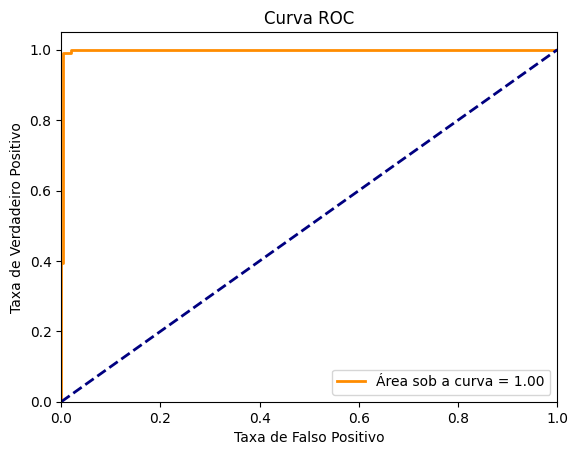

In [89]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt

# Pré-processamento dos dados
avaliacoes_e_filmes['VOTACAO_MEDIA'] = avaliacoes_e_filmes['VOTACAO_MEDIA'].astype(float)
avaliacoes_e_filmes['POPULARIDADE'] = avaliacoes_e_filmes['POPULARIDADE'].astype(float)
avaliacoes_e_filmes['GENERO_ID'] = avaliacoes_e_filmes['GENERO_ID'].astype(str)

avaliacoes_e_filmes['Recomendacao'] = (avaliacoes_e_filmes['VOTACAO_MEDIA'] >= 7) & (avaliacoes_e_filmes['POPULARIDADE'] > 25.497793) & (avaliacoes_e_filmes['GENERO_ID'])

# Divisão dos dados em treinamento e teste
X = avaliacoes_e_filmes[['QT_AVALIACOES', 'POPULARIDADE', 'VOTACAO_MEDIA']]
y = avaliacoes_e_filmes['Recomendacao']  # Adicione uma coluna 'Recomendacao' com rótulos para treinamento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Inicialize e treine o modelo Naive Bayes
model = GaussianNB()
model.fit(X_train, y_train)

# Faça previsões
y_pred = model.predict(X_test)

# Calcule a Acurácia do modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia do modelo: {accuracy}')

# Calcule a Revocação (Recall)
recall = recall_score(y_test, y_pred)
print(f'Revocação (Recall): {recall}')

# F1-Score
f1 = f1_score(y_test, y_pred)
print(f'F1-Score: {f1}')

#  curva ROC
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)


plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Área sob a curva = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=b9a2a253-63c1-4a02-9767-e204bf387a02' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>